# Introduction: 
Project purpose: 
<li> Getting better understanding about dataset 
<li> Knowing how the business performed
<li> Detecting insights behind categories' order counts
    
Method: 
<li> Exploratory Data Analysis
<li> Focusing on the Number of orders across different categories (Products, Product Categogies, Cities, States, ...)   

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [3]:
# Import the clean dataset 
df = pd.read_csv('Sales2019')

# Display the dataset with the first 5 rows
df.head()

,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Product Category,City,State,Revenue,Month,Hour,DayOfWeek,DayType
0,0,141234,iPhone,1.0,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",Phone,Boston,Massachusetts,700.00,1,21,Tuesday,Weekday
1,1,141235,Lightning Charging Cable,1.0,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",Cable,Portland,Oregon,14.95,1,14,Monday,Weekday
2,2,141236,Wired Headphones,2.0,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",Headphones,San Francisco,California,23.98,1,13,Thursday,Weekday
3,3,141237,27in FHD Monitor,1.0,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",Monitor,Los Angeles,California,149.99,1,20,Saturday,Weekend
4,4,141238,Wired Headphones,1.0,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",Headphones,Austin,Texas,11.99,1,11,Friday,Weekday


### For convenience and not repeating code snippets, I will create a class and 2 single functions :
<li> The class plot_chart: to store functions for plotting charts (vertical bar, horizontal bar, pie, line and boxplot chart).
<li> 2 Functions (groupby_count and groupby_sum): to store functions for calculating sum of numerical column (Revenue, Quantity Ordered, Order ID) across different categories (categorical columns).

In [4]:
class plot_chart:
    def __init__(self, dataframe):
        self.df = dataframe
    
    def vertical_bar(self, x_column, y_column, title):
        plt.figure(figsize=(5, 4))
        plt.bar(self.df[x_column], self.df[y_column])
        plt.axhline(self.df[y_column].mean(), color='g', linestyle='--', label='Average')
        plt.xlabel(x_column)
        plt.ylabel(y_column)
        plt.title(title)
        plt.xticks(rotation=60)
        # Format y-axis labels as millions
        formatter = ticker.StrMethodFormatter('{x:,.0f}')
        plt.gca().yaxis.set_major_formatter(formatter)
        plt.legend()
        plt.show()
    
    def horizontal_bar(self, x_column, y_column, title):
        plt.figure(figsize=(5, 4))
        plt.barh(self.df[x_column], self.df[y_column])
        plt.axvline(self.df[y_column].mean(), color='g', linestyle='--', label='Average')
        plt.ylabel(x_column)
        plt.xlabel(y_column)
        plt.title(title)
        plt.legend()
        plt.show()
    
    def pie(self, x_column, y_column, title):
        plt.figure(figsize=(4, 4))
        plt.pie(self.df[y_column], labels=self.df[x_column], autopct='%1.1f%%')
        plt.title(title)
        plt.axis('equal')
        plt.show()
    
    def line(self, x_column, y_column, title):
        plt.figure(figsize=(8, 6))
        plt.plot(self.df[x_column], self.df[y_column])
        plt.xlabel(x_column)
        plt.ylabel(y_column)
        plt.title(title)
        plt.show()
    
    def boxplot(self, x_column, y_column, title):
        plt.figure(figsize=(8, 6))
        plt.boxplot(self.df[y_column])
        plt.xticks(range(1, len(self.df[x_column]) + 1), self.df[x_column])
        plt.xlabel(x_column)
        plt.ylabel(y_column)
        plt.title(title)
        plt.show()


In [5]:
# Create a single function to group the date by categorical column and calculate count/sum the numerical column

# Define groupby_count function with one arguement
def groupby_count(categorical_col):
    # Group by categorical column from dataframe "df", count number of orders from "Order ID"
    # Then reset index for the new dataframe. Finally, sort order counts by descending
    result1 = df.groupby(categorical_col)["Order ID"].count().reset_index().sort_values("Order ID", ascending=False)
    return result1

# Define groupby_sum function with two arguement
def groupby_sum(categorical_col, numerical_col):
    # Group by categorical column from dataframe "df", calculate sum of values from the numerical column
    # Then reset index for the new dataframe. Finally, sort order counts by descending
    result2 = df.groupby(categorical_col)[numerical_col].sum().reset_index().sort_values(numerical_col, ascending=False)
    return result2

# Exploratory Data Analysis (EDA) : the number of orders


### a. Total order counts in 12 months of 2019

In [6]:
# Count number of orders in the entire dataset (after removing inpropreate data)
count_orders = df['Order ID'].count()

# Display the result
print(f'The total orders of 2019 is: {count_orders} orders')

The total orders of 2019 is: 185950 orders


### b. Product Category: Despite being the least expensive product lines, Headphone and Cable 2 have the highest proportion of orders.

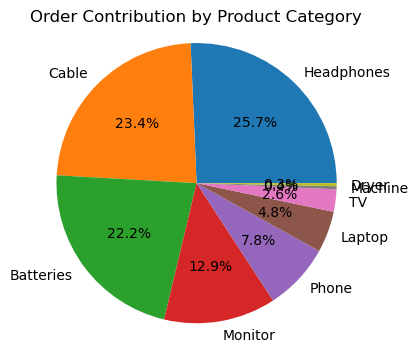

In [7]:
# Calculate order counts across product categories, output is a dataframe
prodcate_orders = groupby_count('Product Category')

# Plot the chart by using the Class plot_chart 
plot_chart(prodcate_orders).pie('Product Category', 'Order ID', 'Order Contribution by Product Category')

### c. Product:The cable, batteries, and headphones product lines are the ones with the lowest prices, but they have the highest order volume, with over 10,000 orders in 2019.

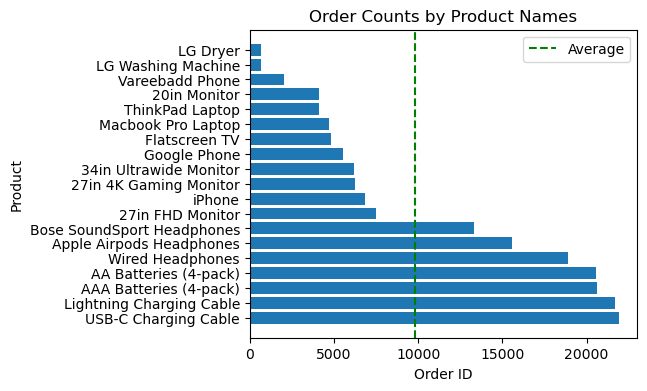

In [8]:
# Calculate order counts across products, output is a dataframe
prod_orders = groupby_count('Product')

# Plot the chart by using the class plot_chart above
plot_chart(prod_orders).horizontal_bar('Product', 'Order ID', 'Order Counts by Product Names')

### d. State: California is the primary market due to its significantly higher order volume, which is three times the average order volume across all states.

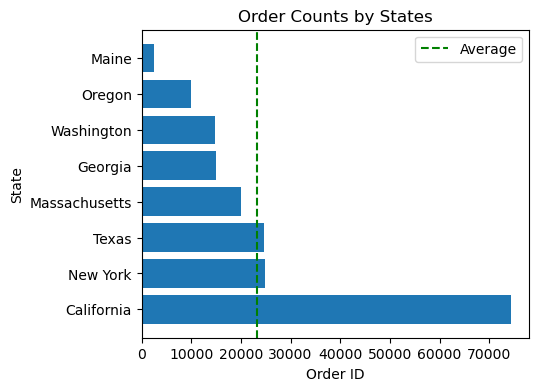

In [9]:
# Calculate order counts across product categories, output is a dataframe
state_orders = groupby_count('State')

# Plot the chart by using the class plot_chart above
plot_chart(state_orders).horizontal_bar('State', 'Order ID', 'Order Counts by States')

### e. CITY: California ranks as the top state in terms of order volume, primarily driven by the high order volumes of its top two cities, San Francisco and Los Angeles.

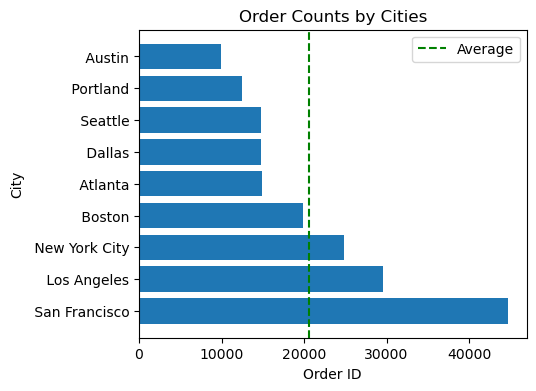

In [10]:
# Calculate order counts across product categories, output is a dataframe
city_orders = groupby_count('City')

# Plot the chart by using the class plot_chart above
plot_chart(city_orders).horizontal_bar('City', 'Order ID', 'Order Counts by Cities')

### In addition, California and Texas are the only two states with markets in two cities. However, California leads in order volume, while the two cities in Texas have order volumes below the average (ranked 9 and 6 out of 10 cities).

In [11]:
# Group by State and City, count orders and then rank the number of orders
StateCity_orders = df.groupby(['State', 'City'])['Order ID'].count().rank(ascending=False, method='min')

# Reset the index and display the dataframe
StateCity_orders.reset_index()

,State,City,Order ID
0,California,Los Angeles,2.0
1,California,San Francisco,1.0
2,Georgia,Atlanta,5.0
3,Maine,Portland,10.0
4,Massachusetts,Boston,4.0
5,New York,New York City,3.0
6,Oregon,Portland,8.0
7,Texas,Austin,9.0
8,Texas,Dallas,6.0
9,Washington,Seattle,7.0


### f. MONTH: The fourth quarter has the highest order counts

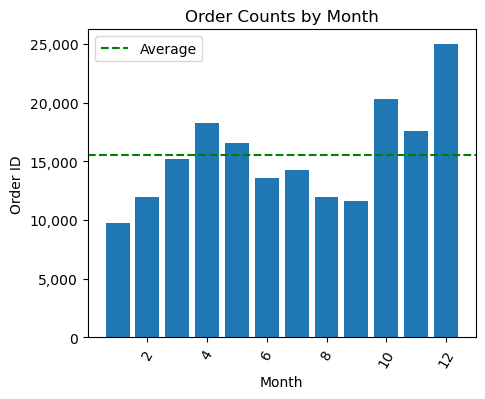

In [12]:
# Calculate order counts across product categories, output is a dataframe
monthly_orders = groupby_count('Month')

# Plot the chart by using the class plot_chart above
plot_chart(monthly_orders).vertical_bar('Month', 'Order ID', 'Order Counts by Month')

### g. HOUR: The peak hours for orders are at 12 PM and 7 PM, which correspond to the lunch and dinner times. 
These hours can be considered as a good opportunity to run advertisements and optimize order volume.

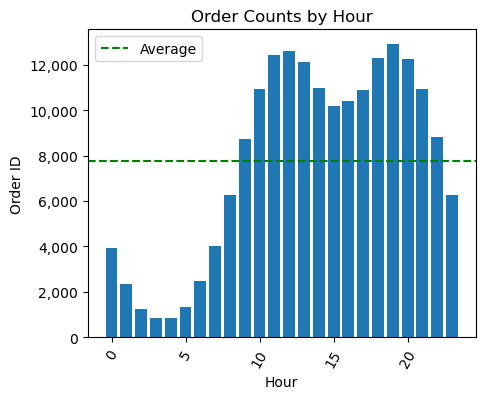

In [13]:
# Calculate order counts across product categories, output is a dataframe
hourly_orders = groupby_count('Hour')

# Plot the chart by using the class plot_chart above
plot_chart(hourly_orders).vertical_bar('Hour', 'Order ID', 'Order Counts by Hour')

### h. DAY OF WEEK: The order volume remains fairly consistent across the days of the week, with no significant variations between the highest and lowest order counts.

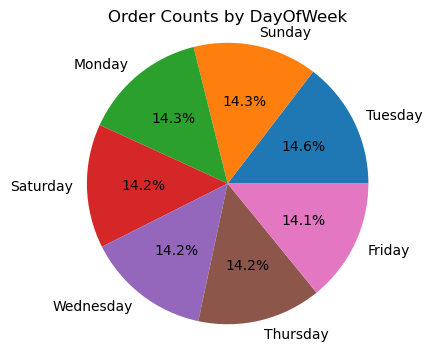

In [14]:
# Calculate order counts across Day of Week, output is a dataframe
DayOfWeek_orders = groupby_count('DayOfWeek')

# Plot the chart by using the class plot_chart above
plot_chart(DayOfWeek_orders).pie('DayOfWeek', 'Order ID', 'Order Counts by DayOfWeek')

##### *Upcoming: Revenue Analysis (across different categories)